In [ ]:
# Useful articles: https://www.nature.com/articles/srep01360#Tab1
#                  https://microdata.unhcr.org/index.php/catalog/518/download/1981

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq
from sympy.printing import latex
from IPython.display import display, Math

<>:14: SyntaxWarning: invalid escape sequence '\ '
<>:14: SyntaxWarning: invalid escape sequence '\ '
C:\Users\zhuzi\AppData\Local\Temp\ipykernel_45268\1825853279.py:14: SyntaxWarning: invalid escape sequence '\ '
  display(Math("ODE\ System:"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

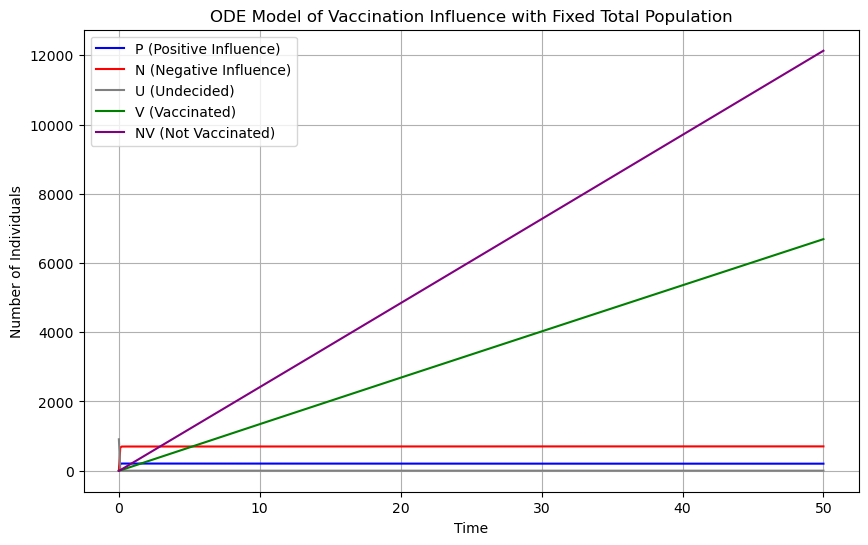

In [2]:
# Define symbols for display
t = symbols('t')
P, N, U, V, NV = symbols('P N U V NV', cls=Function)
lambda_p, lambda_n, m, delta, gamma, alpha_p, alpha_n, sigma = symbols('lambda_p lambda_n m delta gamma alpha_p alpha_n sigma')

# Define the ODEs with social influence factor
ode1 = Eq(P(t).diff(t), lambda_p * U(t) * (1 + m) * (1 + sigma * (P(t) / (P(t) + N(t) + U(t)))) - delta * P(t))
ode2 = Eq(N(t).diff(t), lambda_n * U(t) * (1 + m) * (1 + sigma * (N(t) / (P(t) + N(t) + U(t)))) - gamma * N(t))
ode3 = Eq(U(t).diff(t), delta * P(t) + gamma * N(t) - (lambda_p * (1 + m) * (1 + sigma * (P(t) / (P(t) + N(t) + U(t)))) + lambda_n * (1 + m) * (1 + sigma * (N(t) / (P(t) + N(t) + U(t))))) * U(t))
ode4 = Eq(V(t).diff(t), alpha_p * P(t))
ode5 = Eq(NV(t).diff(t), alpha_n * N(t))

# Display ODEs using LaTeX formatting
display(Math("ODE\ System:"))
display(Math(latex(ode1)))
display(Math(latex(ode2)))
display(Math(latex(ode3)))
display(Math(latex(ode4)))
display(Math(latex(ode5)))

# Parameters
lambda_p_val = 0.84         # Positive influence rate
lambda_n_val = 2.76         # Negative influence rate
m_val = 7.43                # Mood influence factor
sigma_val = 0.1             # Social influence factor
delta_val = 0.05            # Reconsideration rate from P to U
gamma_val = 0.05            # Reconsideration rate from N to U
alpha_p_val = 0.654         # Conversion rate from P to V
alpha_n_val = 0.346         # Conversion rate from N to NV

# Fixed total population
total_population = 908      # Total population fixed at 908 (sum of initial populations in original setup)

# Initial conditions (all undecided)
U_init = total_population   # Initial undecided population
P_init = 0                  # No initial positive influence
N_init = 0                  # No initial negative influence
V_init = 0                  # No initial vaccinated individuals
NV_init = 0                 # No initial non-vaccinated individuals

# Initial state
initial_state = [P_init, N_init, U_init, V_init, NV_init]

# Define the model
def model(t, state):
    P, N, U, V, NV = state
    # Ensure the total population remains fixed
    dP = lambda_p_val * U * (1 + m_val) * (1 + sigma_val * (P / total_population)) - delta_val * P
    dN = lambda_n_val * U * (1 + m_val) * (1 + sigma_val * (N / total_population)) - gamma_val * N
    dU = delta_val * P + gamma_val * N - (lambda_p_val * (1 + m_val) * (1 + sigma_val * (P / total_population)) + lambda_n_val * (1 + m_val) * (1 + sigma_val * (N / total_population))) * U
    dV = alpha_p_val * P
    dNV = alpha_n_val * N
    return [dP, dN, dU, dV, dNV]

# Time points
times = np.linspace(0, 50, 500)

# Solve the system of ODEs
solution = solve_ivp(model, [times[0], times[-1]], initial_state, t_eval=times)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label="P (Positive Influence)", color="blue")
plt.plot(solution.t, solution.y[1], label="N (Negative Influence)", color="red")
plt.plot(solution.t, solution.y[2], label="U (Undecided)", color="gray")
plt.plot(solution.t, solution.y[3], label="V (Vaccinated)", color="green")
plt.plot(solution.t, solution.y[4], label="NV (Not Vaccinated)", color="purple")
plt.title("ODE Model of Vaccination Influence with Fixed Total Population")
plt.xlabel("Time")
plt.ylabel("Number of Individuals")
plt.legend()
plt.grid()
plt.show()

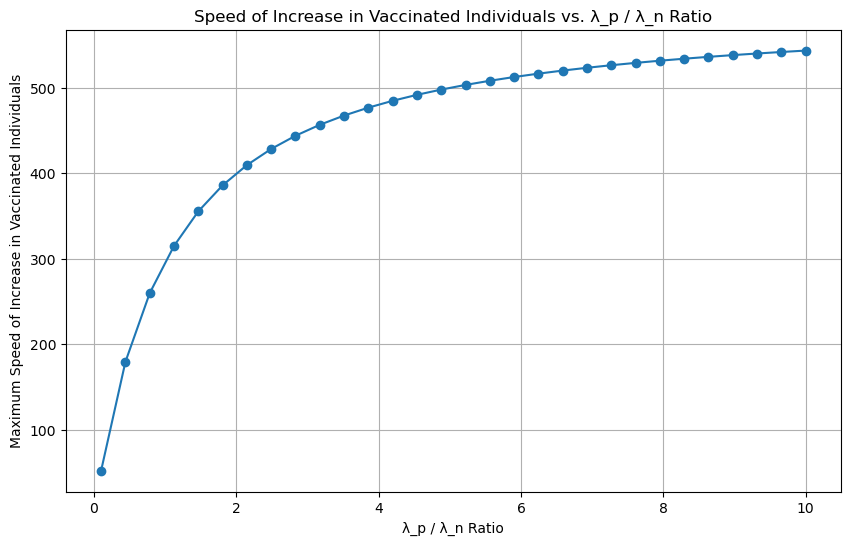

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the range of ratios between lambda_p and lambda_n
ratios = np.linspace(0.1, 10.0, 30)  # Example range for lambda_p / lambda_n ratio

# Other parameters remain constant
m_val = 7.43
sigma_val = 0.1
delta_val = 0.05
gamma_val = 0.05
alpha_p_val = 0.654
alpha_n_val = 0.346
total_population = 908
U_init, P_init, N_init, V_init, NV_init = total_population, 0, 0, 0, 0
initial_state = [P_init, N_init, U_init, V_init, NV_init]
times = np.linspace(0, 50, 500)

# Function to solve the model for given lambda_p and lambda_n
def solve_model(lambda_p, lambda_n):
    def model(t, state):
        P, N, U, V, NV = state
        dP = lambda_p * U * (1 + m_val) * (1 + sigma_val * (P / total_population)) - delta_val * P
        dN = lambda_n * U * (1 + m_val) * (1 + sigma_val * (N / total_population)) - gamma_val * N
        dU = delta_val * P + gamma_val * N - (lambda_p * (1 + m_val) * (1 + sigma_val * (P / total_population)) + lambda_n * (1 + m_val) * (1 + sigma_val * (N / total_population))) * U
        dV = alpha_p_val * P
        dNV = alpha_n_val * N
        return [dP, dN, dU, dV, dNV]

    solution = solve_ivp(model, [times[0], times[-1]], initial_state, t_eval=times)
    return solution

# Store the speed of increase in vaccinated individuals for each ratio
vaccination_increase_speeds = []

for ratio in ratios:
    lambda_n_val = 2.76  # Keep lambda_n constant for simplicity
    lambda_p_val = lambda_n_val * ratio  # Adjust lambda_p based on the ratio

    # Solve the model with the current lambda_p and lambda_n
    solution = solve_model(lambda_p_val, lambda_n_val)
    
    # Calculate the speed of increase in vaccinated individuals (V)
    V_increase_rate = np.gradient(solution.y[3], times)  # Rate of change of V over time
    max_increase_speed = np.max(V_increase_rate)  # Maximum rate of increase
    
    # Store the maximum rate of increase for the current ratio
    vaccination_increase_speeds.append(max_increase_speed)

# Plot the speed of increase against the lambda_p / lambda_n ratio
plt.figure(figsize=(10, 6))
plt.plot(ratios, vaccination_increase_speeds, marker='o', linestyle='-')
plt.title("Speed of Increase in Vaccinated Individuals vs. λ_p / λ_n Ratio")
plt.xlabel("λ_p / λ_n Ratio")
plt.ylabel("Maximum Speed of Increase in Vaccinated Individuals")
plt.grid()
plt.show()

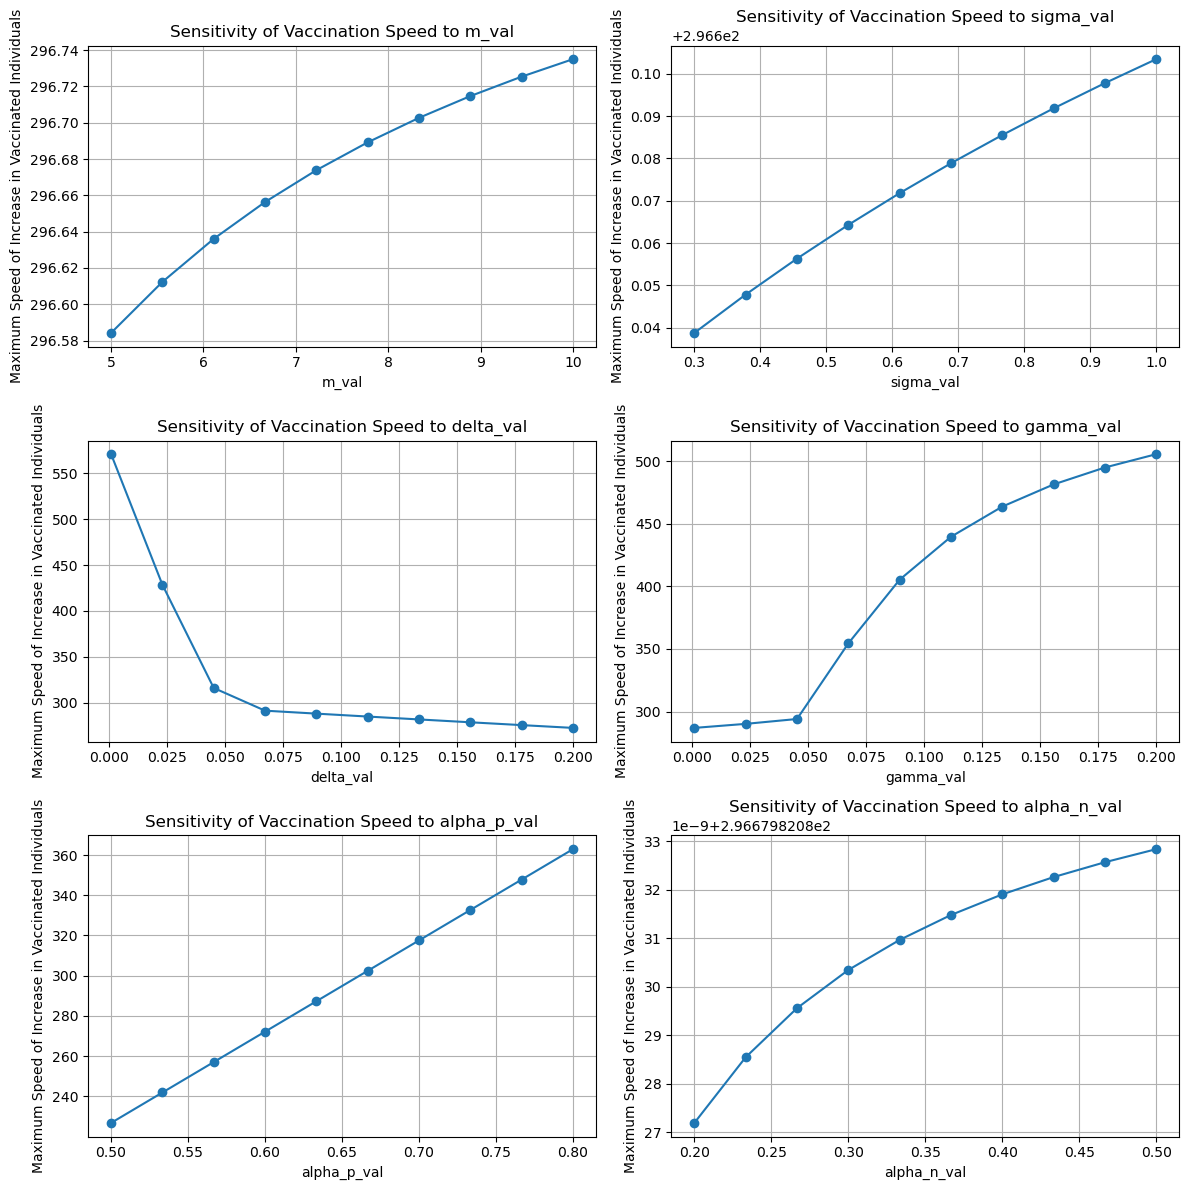

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameter ranges for sensitivity analysis
m_values = np.linspace(5, 10, 10)           # Range for mood influence factor
sigma_values = np.linspace(0.3, 1.0, 10)    # Range for social influence factor
delta_values = np.linspace(0.001, 0.2, 10)   # Range for reconsideration rate (P to U)
gamma_values = np.linspace(0.001, 0.2, 10)   # Range for reconsideration rate (N to U)
alpha_p_values = np.linspace(0.5, 0.8, 10)  # Range for conversion rate from P to V
alpha_n_values = np.linspace(0.2, 0.5, 10)  # Range for conversion rate from N to NV

# Constants
total_population = 908
ratios = [1.0]  # Fixed ratio for lambda_p / lambda_n for sensitivity analysis
lambda_n_val = 2.76
times = np.linspace(0, 100, 50)
initial_state = [0, 0, total_population, 0, 0]

# Function to solve the model for given parameters
def solve_model(lambda_p, lambda_n, m_val, sigma_val, delta_val, gamma_val, alpha_p_val, alpha_n_val):
    def model(t, state):
        P, N, U, V, NV = state
        dP = lambda_p * U * (1 + m_val) * (1 + sigma_val * (P / total_population)) - delta_val * P
        dN = lambda_n * U * (1 + m_val) * (1 + sigma_val * (N / total_population)) - gamma_val * N
        dU = delta_val * P + gamma_val * N - (lambda_p * (1 + m_val) * (1 + sigma_val * (P / total_population)) + lambda_n * (1 + m_val) * (1 + sigma_val * (N / total_population))) * U
        dV = alpha_p_val * P
        dNV = alpha_n_val * N
        return [dP, dN, dU, dV, dNV]

    solution = solve_ivp(model, [times[0], times[-1]], initial_state, t_eval=times)
    return solution

# Helper function to get the maximum speed of increase for V
def max_speed_of_increase(lambda_ratio, **kwargs):
    lambda_p_val = lambda_n_val * lambda_ratio
    solution = solve_model(lambda_p_val, lambda_n_val, **kwargs)
    V_increase_rate = np.gradient(solution.y[3], times)
    return np.max(V_increase_rate)

# Analyze sensitivity for each parameter
sensitivity_results = {}

# Sensitivity to m_val
sensitivity_results['m_val'] = [max_speed_of_increase(1.0, m_val=m, sigma_val=0.7, delta_val=0.05, gamma_val=0.05, alpha_p_val=0.654, alpha_n_val=0.346) for m in m_values]

# Sensitivity to sigma_val
sensitivity_results['sigma_val'] = [max_speed_of_increase(1.0, m_val=7.43, sigma_val=sigma, delta_val=0.05, gamma_val=0.05, alpha_p_val=0.654, alpha_n_val=0.346) for sigma in sigma_values]

# Sensitivity to delta_val
sensitivity_results['delta_val'] = [max_speed_of_increase(1.0, m_val=7.43, sigma_val=0.7, delta_val=delta, gamma_val=0.05, alpha_p_val=0.654, alpha_n_val=0.346) for delta in delta_values]

# Sensitivity to gamma_val
sensitivity_results['gamma_val'] = [max_speed_of_increase(1.0, m_val=7.43, sigma_val=0.7, delta_val=0.05, gamma_val=gamma, alpha_p_val=0.654, alpha_n_val=0.346) for gamma in gamma_values]

# Sensitivity to alpha_p_val
sensitivity_results['alpha_p_val'] = [max_speed_of_increase(1.0, m_val=7.43, sigma_val=0.7, delta_val=0.05, gamma_val=0.05, alpha_p_val=alpha_p, alpha_n_val=0.346) for alpha_p in alpha_p_values]

# Sensitivity to alpha_n_val
sensitivity_results['alpha_n_val'] = [max_speed_of_increase(1.0, m_val=7.43, sigma_val=0.7, delta_val=0.05, gamma_val=0.05, alpha_p_val=0.654, alpha_n_val=alpha_n) for alpha_n in alpha_n_values]

# Plotting sensitivity results
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

# Plot sensitivity for each parameter
for i, (param, values) in enumerate(sensitivity_results.items()):
    ax = axes[i]
    param_range = eval(f"{param.replace('_val', '_values')}")
    ax.plot(param_range, values, marker='o', linestyle='-')
    ax.set_title(f"Sensitivity of Vaccination Speed to {param}")
    ax.set_xlabel(param)
    ax.set_ylabel("Maximum Speed of Increase in Vaccinated Individuals")
    ax.grid()

plt.tight_layout()
plt.show()
